In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import powerlaw
from statsmodels.stats import diagnostic
from datetime import datetime
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [194]:
%reload_ext autoreload

In [195]:
from read_functions import *
from pickle_functions import *
from create_all_users import create_all_users
from create_rating_statistic import create_ratings_stat

In [4]:
beer_advocate_path = '../datas/BeerAdvocate/'
matched_beer_data_path = '../datas/matched_beer_data/'
rate_beer_path = '../datas/RateBeer/'

advocate_beers_path = beer_advocate_path + 'beers.csv'
advovate_breweries_path = beer_advocate_path + 'breweries.csv'
advocate_ratings_path = beer_advocate_path + 'ratings.txt'
advocate_reviews_path = beer_advocate_path + 'reviews.txt'
advocate_users_path = beer_advocate_path + 'users.csv'

matched_beer_beers = matched_beer_data_path + 'beers.csv'
matched_beer_breweries = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx = matched_beer_data_path + 'users_approx.csv'
matched_beer_users = matched_beer_data_path + 'users.csv'

rate_beer_beers = rate_beer_path + 'beers.csv'
rate_beer_breweries = rate_beer_path + 'breweries.csv'
rate_beer_users = rate_beer_path + 'users.csv'
rate_beer_ratings = rate_beer_path + 'ratings.txt'
rate_beer_reviews = rate_beer_path + 'reviews.txt'

contries_path = '../datas/countries/countries.csv'


In [5]:
beer_advocate_path = '../datas/BeerAdvocate/pickle/'
matched_beer_data_path = '../datas/matched_beer_data/pickle/'
rate_beer_path = '../datas/RateBeer/pickle/'

advocate_beers_path_pickle = beer_advocate_path + 'beers.csv'
advovate_breweries_path_pickle = beer_advocate_path + 'breweries.csv'
advocate_ratings_path_pickle = beer_advocate_path + 'ratings.txt'
advocate_reviews_path_pickle = beer_advocate_path + 'reviews.txt'
advocate_users_path_pickle = beer_advocate_path + 'users.csv'

matched_beer_beers_pickle = matched_beer_data_path + 'beers.csv'
matched_beer_breweries_pickle = matched_beer_data_path + 'breweries.csv'
matched_beer_ratings_ba_pickle = matched_beer_data_path + 'ratings_ba.txt'
matched_beer_ratings_rb_pickle = matched_beer_data_path + 'ratings_rb.txt'
matched_beer_ratings_pickle = matched_beer_data_path + 'ratings.csv'
matched_beer_users_approx_pickle = matched_beer_data_path + 'users_approx.csv'
matched_beer_users_pickle = matched_beer_data_path + 'users.csv'

rate_beer_beers_pickle = rate_beer_path + 'beers.csv'
rate_beer_breweries_pickle = rate_beer_path + 'breweries.csv'
rate_beer_users_pickle = rate_beer_path + 'users.csv'
rate_beer_ratings_pickle = rate_beer_path + 'ratings.txt'
rate_beer_reviews_pickle = rate_beer_path + 'reviews.txt'

In [6]:
#Define list of datas for each website
datas_matched_beer_names = ['df_matched_beer_beers','df_matched_beer_breweries','df_matched_beer_ratings_ba','df_matched_beer_ratings_rb','df_matched_beer_ratings','df_matched_beer_users_approx','df_matched_beer_users']
datas_advocate_names = ['df_advocate_beers','df_advocate_breweries','df_advocate_ratings','df_advocate_reviews','df_advocate_users']
datas_rate_beer_names = ['df_rate_beer_beers','df_rate_beer_breweries','df_rate_beer_users','df_rate_beer_ratings','df_rate_beer_ratings']

### import datas 

### Import datas stored as pickle

In [182]:
df_matched_beer_beers,df_matched_beer_breweries,df_matched_beer_ratings_ba,df_matched_beer_ratings_rb,df_matched_beer_ratings,df_matched_beer_users_approx,df_matched_beer_users = load_datas('matched_beer_data', datas_matched_beer_names)
df_rate_beer_beers,df_rate_beer_breweries,df_rate_beer_users,df_rate_beer_ratings,df_rate_beer_reviews = load_datas('RateBeer', datas_rate_beer_names)
df_advocate_beers,df_advocate_breweries,df_advocate_ratings,df_advocate_reviews,df_advocate_users = load_datas('BeerAdvocate', datas_advocate_names)

Loading df_matched_beer_beers...
Loading df_matched_beer_breweries...
Loading df_matched_beer_ratings_ba...
Loading df_matched_beer_ratings_rb...
Loading df_matched_beer_ratings...
Loading df_matched_beer_users_approx...
Loading df_matched_beer_users...
Loading df_rate_beer_beers...
Loading df_rate_beer_breweries...
Loading df_rate_beer_users...
Loading df_rate_beer_ratings...
Loading df_rate_beer_ratings...
Loading df_advocate_beers...
Loading df_advocate_breweries...
Loading df_advocate_ratings...
Loading df_advocate_reviews...
Loading df_advocate_users...


## Store dataFrame into picke format

In [ ]:
datas_rate_beer = [df_rate_beer_beers,df_rate_beer_breweries,df_rate_beer_users,df_rate_beer_ratings,df_rate_beer_reviews]
datas_matched_beer = [df_matched_beer_beers,df_matched_beer_breweries,df_matched_beer_ratings_ba,df_matched_beer_ratings_rb,df_matched_beer_ratings,df_matched_beer_users_approx,df_matched_beer_users]
datas_advocate_beer = [df_advocate_beers,df_advocate_breweries,df_advocate_ratings,df_advocate_reviews,df_advocate_users]

In [ ]:
#Saving datas
save_datas('RateBeer', datas_rate_beer,datas_rate_beer_names)
save_datas('matched_beer_data', datas_matched_beer,datas_matched_beer_names)

# Initial data analysis

## Preprocessing datasets

In [183]:
df_matched_beer_users_index = deepcopy(df_matched_beer_users.iloc[0,:])
df_matched_beer_users.drop(index = 0, inplace = True)

In [184]:
#convert join date to datetime
# -*- matched -*-
df_matched_beer_users['ba'] = pd.to_datetime(pd.to_numeric(df_matched_beer_users['ba']),unit='s')
df_matched_beer_users['rb'] = pd.to_datetime(pd.to_numeric(df_matched_beer_users['rb']),unit='s')

# -*- rate_beer -*-
df_rate_beer_users['joined'] = pd.to_datetime(pd.to_numeric(df_rate_beer_users['joined']),unit='s')

In [185]:
#delete duplicate user_id

# -*- Rate Beer -*-
df_rate_beer_users.drop_duplicates(subset = 'user_id', inplace = True)
# -*- Beer Advocate -*-
df_advocate_users.drop_duplicates(subset = 'user_id', inplace = True)

## Merging Datasets

In [287]:
df_all_users = create_all_users(df_advocate_users,df_matched_beer_users,df_rate_beer_users)

In [293]:
df_ratings_stat = create_ratings_stat(df_advocate_ratings,df_rate_beer_ratings, df_all_users)

Creating copies...
Merge with advocate users...
Merge with rate beer users...
Concatenate the two dataframes...
Change date format...


/Users/vincentroduit/Documents/document_vincent/epfl/master/ma1/applied_data_analysis/project/ada-2023-project-remontada/code/create_rating_statistic.py:40: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  print('Create final dataframe...')


In [294]:
df_ratings_stat.head()

,location,joined,year,user_name,nb_ratings
0,"United States, Washington",2010-02-10 11:00:00,2015,nmann08,1162
2,"United States, Washington",2010-02-10 11:00:00,2011,nmann08,1712
3,"United States, Washington",2010-02-10 11:00:00,2013,nmann08,1348
5,"United States, Washington",2010-02-10 11:00:00,2012,nmann08,788
9,"United States, Washington",2010-02-10 11:00:00,2016,nmann08,974


## Analysis of the distribution
 1. Beer Advocate

In [155]:
Advocate_users_per_country = deepcopy(pd.DataFrame(df_advocate_users.groupby('location')['user_id'].count()))
Advocate_users_per_country.columns = ['nb_users']
Advocate_users_per_country.sort_values(ascending=False, by='nb_users', inplace=True)
Advocate_users_per_country[Advocate_users_per_country.index.str.startswith('United States')].agg('sum')

Advocate_users_per_country.loc['United States', 'nb_users'] = Advocate_users_per_country[
    Advocate_users_per_country.index.str.startswith('United')
]['nb_users'].sum()
Advocate_users_per_country.drop(labels=Advocate_users_per_country[Advocate_users_per_country.index.str.startswith('United States,')].index, inplace=True)
Advocate_users_per_country.sort_values(ascending=False, by='nb_users', inplace=True)    

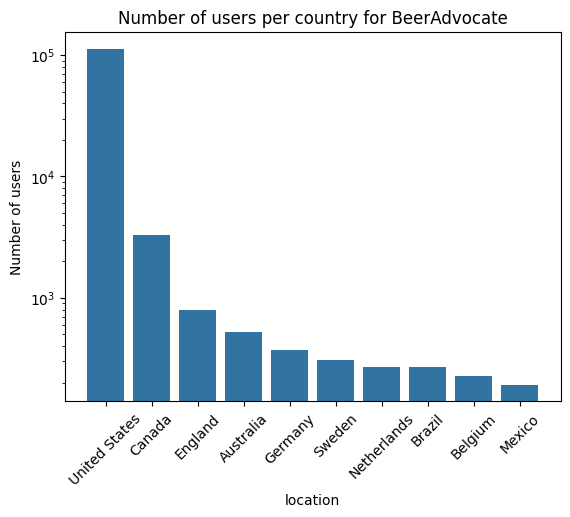

In [156]:
sns.barplot(x=Advocate_users_per_country.index[:10], y=Advocate_users_per_country['nb_users'][:10])
plt.title('Number of users per country for BeerAdvocate')
plt.ylabel('Number of users')
plt.semilogy()
plt.xticks(rotation=45)
plt.show()

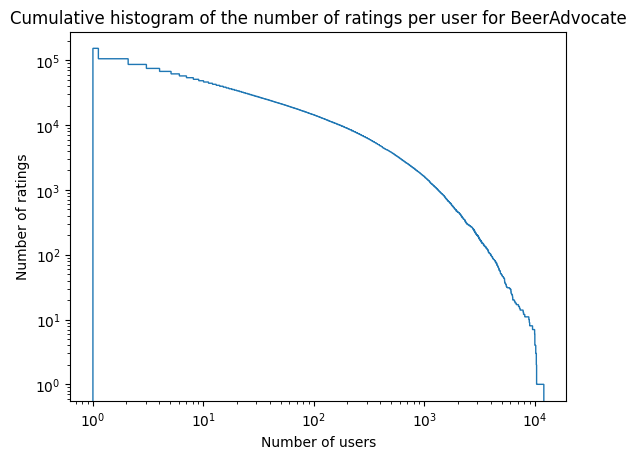

In [157]:
plt.hist(data=df_advocate_users, x='nbr_ratings', bins=100000, cumulative=-1, histtype='step')
plt.title('Cumulative histogram of the number of ratings per user for BeerAdvocate')
plt.xlabel('Number of users')
plt.ylabel('Number of ratings')
plt.loglog()
plt.show()

In [158]:
# Define the power law function
def power_law(x, alpha):
    return x**(-alpha)

Calculating best minimal value for power law fit
alpha = 3.0597838418854195
R = 1.7371193143601138
p = 0.0823661128345653


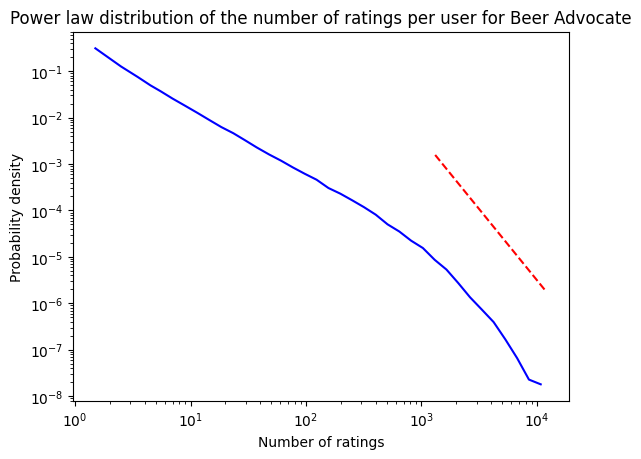

In [159]:
fit = powerlaw.Fit(df_advocate_users['nbr_ratings'].values)

print('alpha =', fit.alpha)

# R: loglikelihood ratio of the two distributions if positive the first distribution is better
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print('R =', R)
print('p =', p)

powerlaw.plot_pdf(df_advocate_users['nbr_ratings'].values, color='b')
fit.power_law.plot_pdf(color='r', linestyle='--')

plt.title('Power law distribution of the number of ratings per user for Beer Advocate')
plt.xlabel('Number of ratings')
plt.ylabel('Probability density')
plt.show()

2. Rate Beer

In [160]:
rate_beer_users_per_country = deepcopy(pd.DataFrame(df_rate_beer_users.groupby('location')['user_id'].count()))
rate_beer_users_per_country.columns = ['nb_users']
rate_beer_users_per_country.sort_values(ascending=False, by='nb_users', inplace=True)

rate_beer_users_per_country.loc['United States', 'nb_users'] = rate_beer_users_per_country[
    rate_beer_users_per_country.index.str.startswith('United')
]['nb_users'].sum()
rate_beer_users_per_country.drop(labels=rate_beer_users_per_country[rate_beer_users_per_country.index.str.startswith('United States,')].index, inplace=True)
rate_beer_users_per_country.sort_values(ascending=False, by='nb_users', inplace=True)   

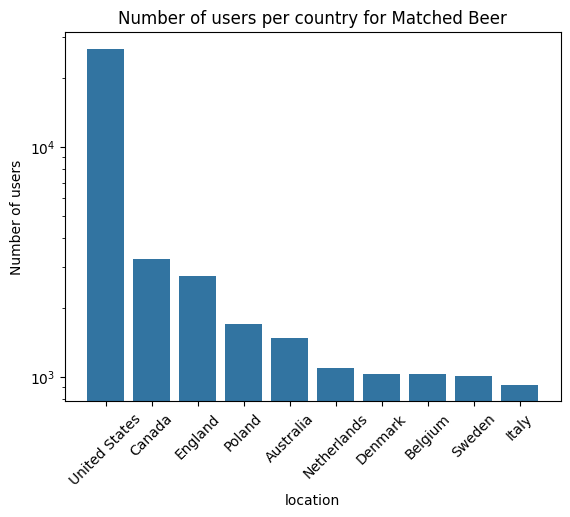

In [161]:
sns.barplot(x=rate_beer_users_per_country.index[:10], y=rate_beer_users_per_country['nb_users'][:10])
plt.title('Number of users per country for Matched Beer')
plt.ylabel('Number of users')
plt.semilogy()
plt.xticks(rotation=45)
plt.show()

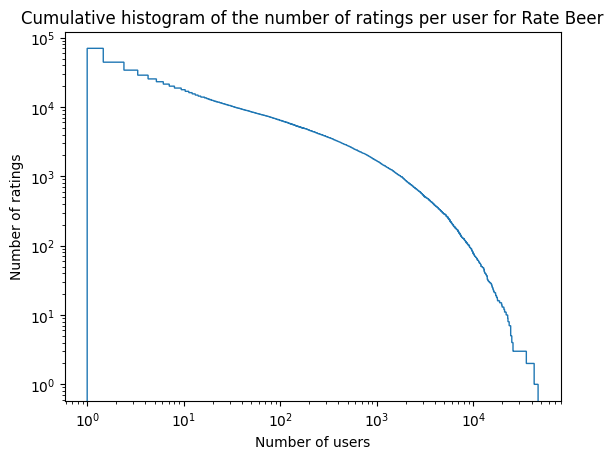

In [162]:
plt.hist(data=df_rate_beer_users, x='nbr_ratings', bins=100000, cumulative=-1, histtype='step')
plt.title('Cumulative histogram of the number of ratings per user for Rate Beer')
plt.xlabel('Number of users')
plt.ylabel('Number of ratings')
plt.loglog()
plt.show()

Calculating best minimal value for power law fit
alpha = 1.5388512306661761
R = 81.0874826305118
p = 0.0


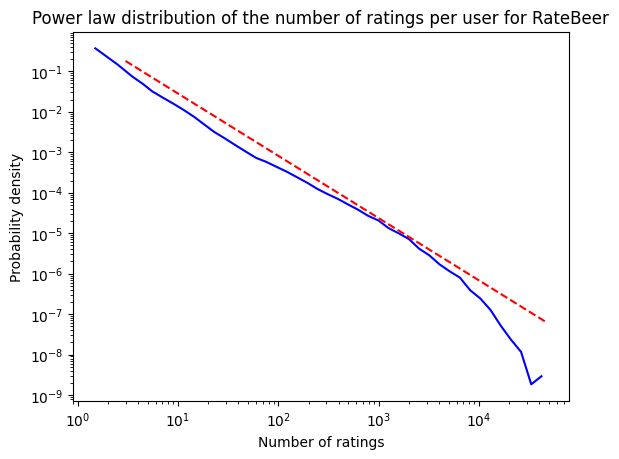

In [163]:
fit = powerlaw.Fit(df_rate_beer_users['nbr_ratings'].values)

print('alpha =', fit.alpha)

# R: loglikelihood ratio of the two distributions if positive the first distribution is better
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print('R =', R)
print('p =', p)

powerlaw.plot_pdf(df_rate_beer_users['nbr_ratings'].values, color='b')
fit.power_law.plot_pdf(color='r', linestyle='--')

plt.title('Power law distribution of the number of ratings per user for RateBeer')
plt.xlabel('Number of ratings')
plt.ylabel('Probability density')
plt.show()